In [1]:
import numpy as np
from numpy.linalg import norm
import os
import time
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from PIL import Image

In [2]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [3]:
model = VGG16(weights='imagenet', include_top=False, input_shape =(224, 224, 3))

In [4]:
def extract_features(path, model): 
    img = image.load_img(path, target_size=(224, 224, 3))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [5]:
def store_embeddings(df):
    
    
    data1, data2, labels = [], [], []

    for _,row in df.iterrows():
        img_one = extract_features('data/'+ row['HeroID'], model)
        img_two = extract_features('data/'+ row['StylingID'], model)
        label = row['Match']
        labels.append(label)
        

        data1.append(img_one)
        data2.append(img_two)

        
    labels = np.array(labels)
    data1 = np.array(data1)
    data2 = np.array(data2)

    return data1, data2, labels

In [6]:
import pandas as pd

In [7]:
train = pd.read_csv('data/pracdat.csv')

In [8]:
traindata1, traindata2, trainlabel = store_embeddings(train)

In [9]:
tsne_results = TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(traindata1)

[t-SNE] Computing 17 nearest neighbors...
[t-SNE] Indexed 18 samples in 0.001s...
[t-SNE] Computed neighbors for 18 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.401321
[t-SNE] KL divergence after 1000 iterations: 0.377109


In [10]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

In [11]:
from PIL import Image

In [12]:
def plot_images_in_2d(x, y, image_paths, axis=None, zoom=1):
    if axis is None:
        axis = plt.gca()
    x, y = np.atleast_1d(x, y)
    for x0, y0, image_path in zip(x, y, image_paths):
        image = Image.open(image_path)
        image.thumbnail((100, 100), Image.ANTIALIAS)
        img = OffsetImage(image, zoom=zoom)
        anno_box = AnnotationBbox(img, (x0, y0),
                                  xycoords='data',
                                  frameon=False)
        axis.add_artist(anno_box)
    axis.update_datalim(np.column_stack([x, y]))
    axis.autoscale()

In [13]:
def show_tsne(x, y, selected_filenames):
    fig, axis = plt.subplots()
    fig.set_size_inches(22, 22, forward=True)
    plot_images_in_2d(x, y, selected_filenames, zoom=1, axis=axis)
    plt.show()

In [15]:
filenames=[]
for _,row in train.iterrows():
        img_one = 'data/'+ row['HeroID']
        filenames.append(img_one)
data1 = np.array(filenames)

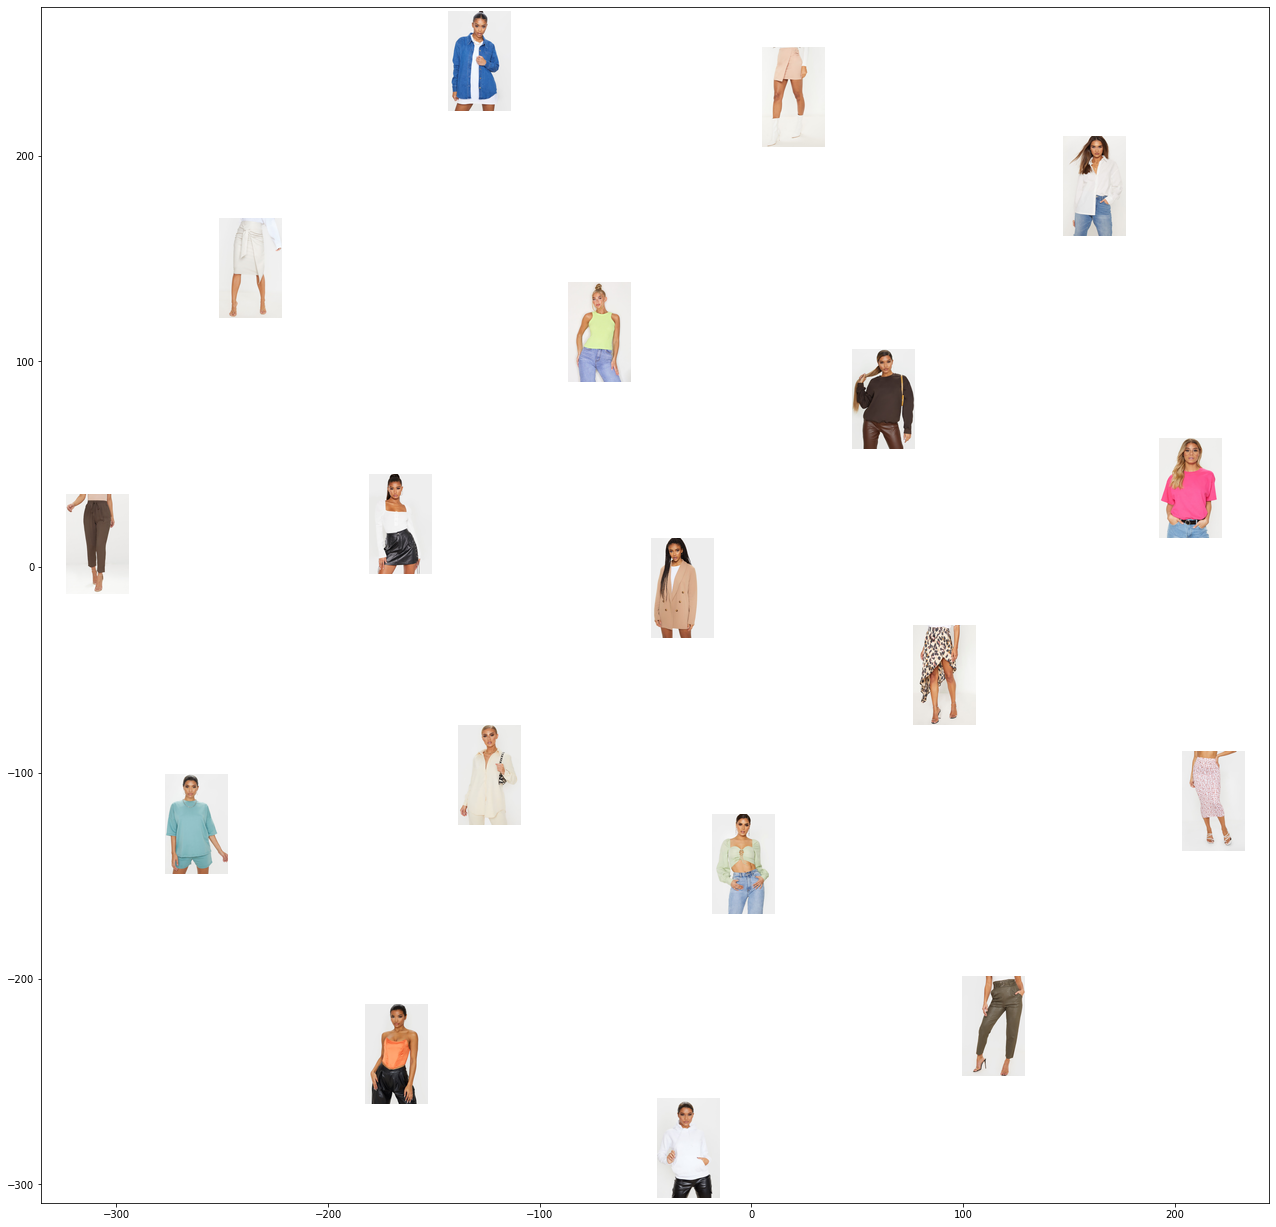

In [17]:
show_tsne(tsne_results[:, 0], tsne_results[:, 1], data1)

In [16]:
print(data1)

['data/tops/top1.jpeg' 'data/tops/top2.jpeg' 'data/tops/top3.jpg'
 'data/tops/top4.jpeg' 'data/tops/top6.jpeg' 'data/tops/top20.jpeg'
 'data/tops/top39.jpg' 'data/tops/top36.jpg' 'data/skirts/skirt18.jpg'
 'data/skirts/skirt14.jpg' 'data/tops/top13.jpeg'
 'data/trousers/trousers7.jpg' 'data/skirts/skirt4.jpg'
 'data/tops/top16.jpeg' 'data/tops/top12.jpeg' 'data/tops/top26.jpg'
 'data/trousers/trousers8.jpg' 'data/skirts/skirt1.jpg']


In [18]:
from sklearn.decomposition import PCA

In [39]:
num_feature_dimensions=   # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(traindata1)
feature_list_compressed = pca.transform(traindata1)

# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = feature_list_compressed[:18]
#selected_class_ids = class_ids[:50]
#selected_filenames = filenames[:50]

tsne_results = TSNE(n_components=2,verbose=1,metric='cosine').fit_transform(selected_features)

# Plot a scatter plot from the generated t-SNE results
colormap = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1],cmap=colormap)
plt.colorbar(scatter_plot)
plt.show()

SyntaxError: invalid syntax (<ipython-input-39-1ca07fca703e>, line 1)

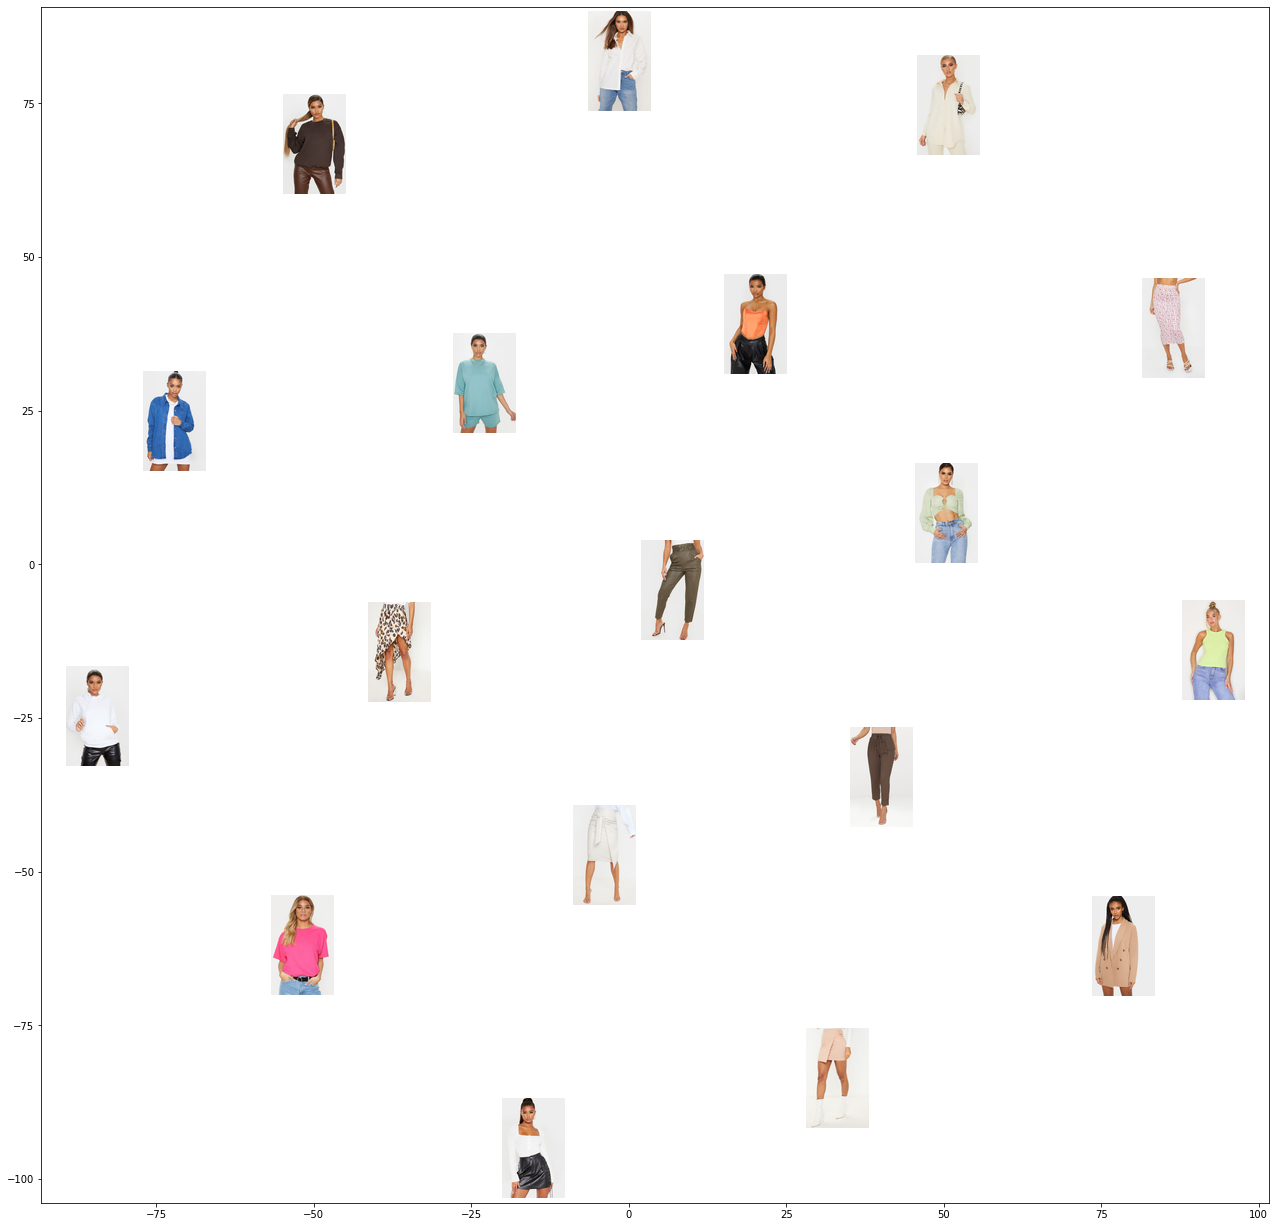

In [38]:
show_tsne(tsne_results[:, 0], tsne_results[:, 1], data1)

In [30]:
allfeatures = traindata1+traindata2

In [31]:
print(len(allfeatures))

18
